'placement.csv' is a file containing 100 records of: 

    1.student's cgpa (scale out of 10) 
    2.iq 
    3.placement(job) 
        -0: student didn't got placement
        -1: student got placement

Dependent variable: cgpa, iq
Independent variable: placement

Here, logistic regression model is used to identify a student that he/she will get placement or not based on his/her score of cgpa & iq.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


Step1: Preprocess + EDA + Feature Selection

In [4]:
# remove col 1: unnamed column
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


Text(0, 0.5, 'iq')

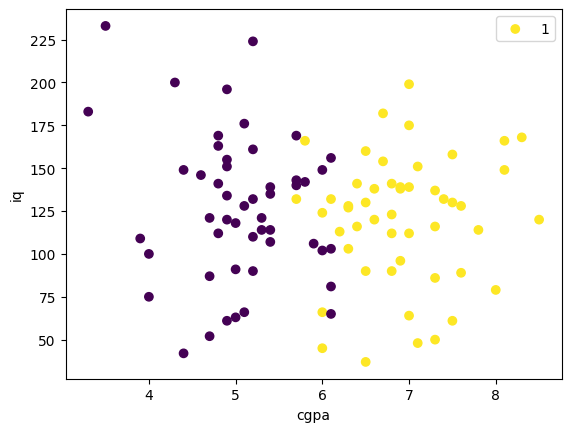

In [5]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.legend(df['placement'])
plt.xlabel('cgpa')
plt.ylabel('iq')

As per the visualization of the data, we would use, logistic regression to train the model

Step 2: Extract input & output columns

In [6]:
# input
input = df.iloc[:,:2]
# output
output = df.iloc[:,-1]
output

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

Step 3: Split Train & Test values. 
Train = 90% data

In [7]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output = train_test_split(input,output,train_size=0.9)

Step 4: Scale the data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# z-transform
scaler = StandardScaler()
train_input = scaler.fit_transform(train_input)
train_input

array([[-1.0723824 , -0.11282808],
       [ 0.73082288, -0.34303146],
       [-0.90064856,  0.21968792],
       [-0.64304781,  2.52172174],
       [ 0.12975445, -0.57323484],
       [ 0.64495596,  1.44743929],
       [ 0.8166898 ,  0.32200053],
       [-0.90064856,  0.75682914],
       [ 1.3318913 ,  0.1173753 ],
       [-0.72891473,  0.066219  ],
       [-1.32998315,  0.60336022],
       [ 0.47322213,  0.88471991],
       [-0.64304781,  0.16853161],
       [-0.47131397,  0.34757869],
       [ 0.73082288, -0.90575084],
       [ 1.16015747,  0.29642238],
       [-0.04197938, -0.49650038],
       [ 0.90255671,  1.26839221],
       [ 0.90255671,  1.8822679 ],
       [-0.98651548,  1.11492329],
       [-0.90064856,  0.65451653],
       [ 0.98842363,  0.65451653],
       [ 1.16015747, -1.00806345],
       [-0.64304781, -0.39418777],
       [ 0.55908904, -0.13840623],
       [-1.67345082, -1.28942314],
       [-0.90064856, -0.13840623],
       [-0.47131397, -0.47092223],
       [ 0.30148829,

In [10]:
test_input = scaler.transform(test_input)
test_input

array([[-0.21371322,  0.37315684],
       [-0.81478164, -0.88017268],
       [-0.21371322,  1.11492329],
       [ 1.3318913 , -1.64751729],
       [ 0.47322213, -2.26139298],
       [ 0.90255671, -1.57078283],
       [ 0.38735521, -0.24071885],
       [ 0.30148829, -0.57323484],
       [ 1.3318913 ,  0.8335636 ],
       [ 0.12975445,  0.16853161]])

Step 5: Train the model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# logistic regression object
lr_object = LogisticRegression()

In [13]:
# give training data to lr_object
lr_object.fit(train_input,train_output)

LogisticRegression()

Step 6: Evaluate model

In [14]:
predict_test = lr_object.predict(test_input)
print(test_output,predict_test)

36    0
25    0
84    0
44    1
82    1
64    1
13    1
98    1
91    1
71    1
Name: placement, dtype: int64 [0 0 0 1 1 1 1 1 1 1]


Step 7: Check Model accuracy rate 

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(test_output,predict_test) # 90% accurate

1.0

Plotting the model

In [17]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot: >

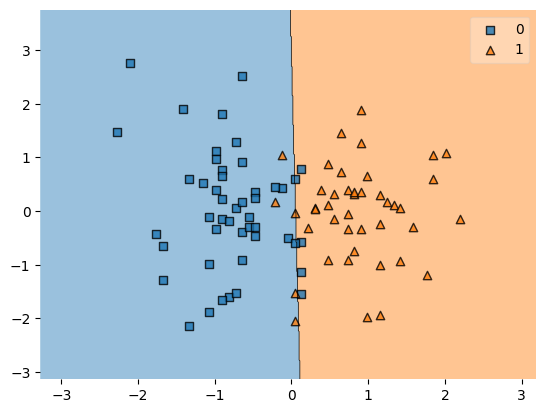

In [18]:
plot_decision_regions(train_input,train_output.values,clf=lr_object)

Step 8: Deploy model in pickle

In [19]:
import pickle

In [20]:
with open('lr_model.pkl','wb') as model:
    pickle.dump(lr_object,model)

Run model and check the outputs

In [21]:
with open('lr_model.pkl','rb') as model_open:
    pickle.load(model_open)
    

In [22]:
# 2 records : 
# cgpa-1.5 , iq = 100
# cgpa-6.5 , iq = 160

input = np.array([[1.5,100],[6.5,160]])
input

array([[  1.5, 100. ],
       [  6.5, 160. ]])

In [23]:
# transform input to z-score
t_input = scaler.transform(input)
t_input

C:\Users\jivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-3.82012377, -0.6499693 ],
       [ 0.47322213,  0.88471991]])

In [24]:
# predict the output
lr_object.predict(t_input)

array([0, 1], dtype=int64)